<a href="https://colab.research.google.com/github/vishva2410/Deep-Learning-Projects-Part-A-/blob/main/Brain_tumor_complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00


In [91]:
import pandas as pd
import numpy as np
import cv2
import random
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from glob import glob
from PIL import Image
from tensorflow.keras import layers, models, regularizers, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from PIL import Image
import gradio as gr # ignore this library this just for deployment

shows error because it has alredy been extracted---->


In [3]:
path_test = "/content/archive/Test"
print(os.listdir(path_test))
classes = os.listdir(path_test)

['pituitary', 'meningioma', 'glioma', 'notumor']


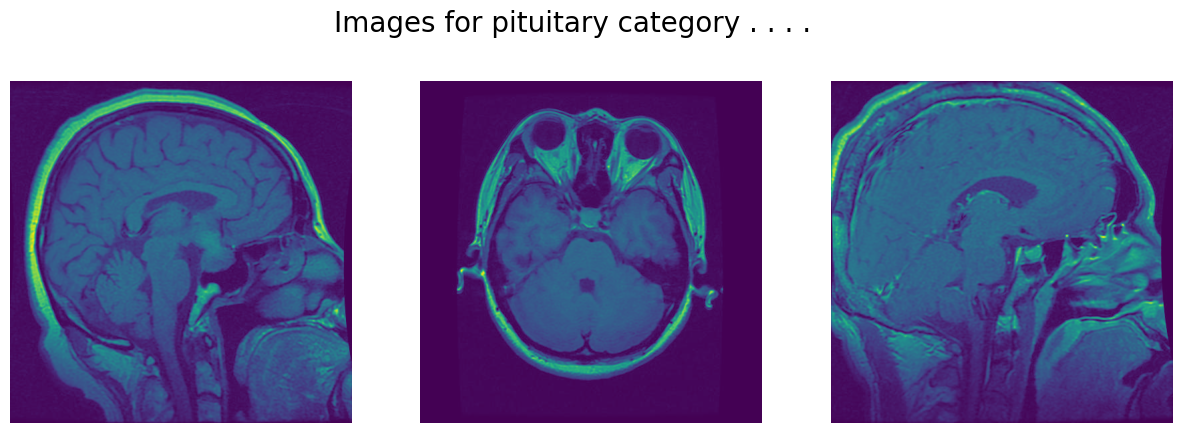

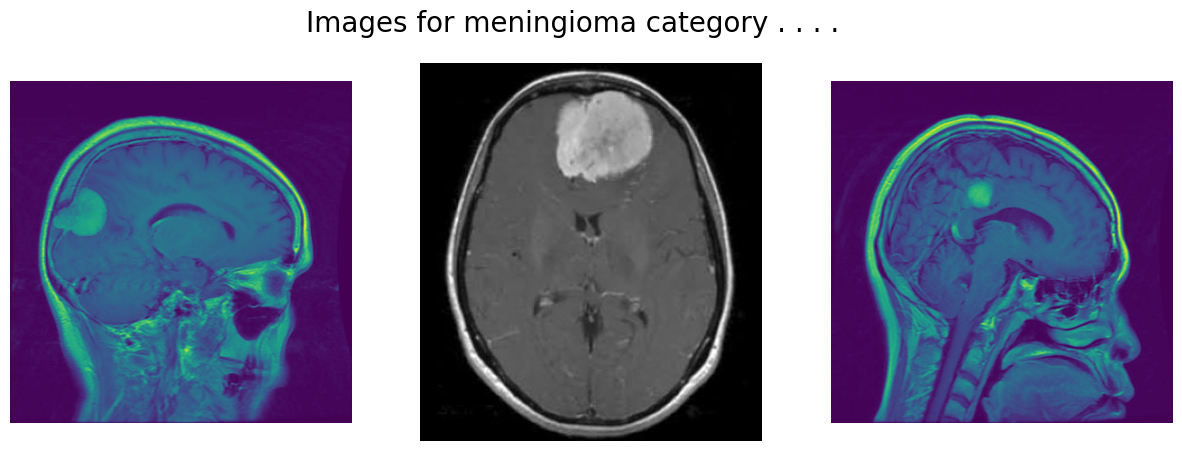

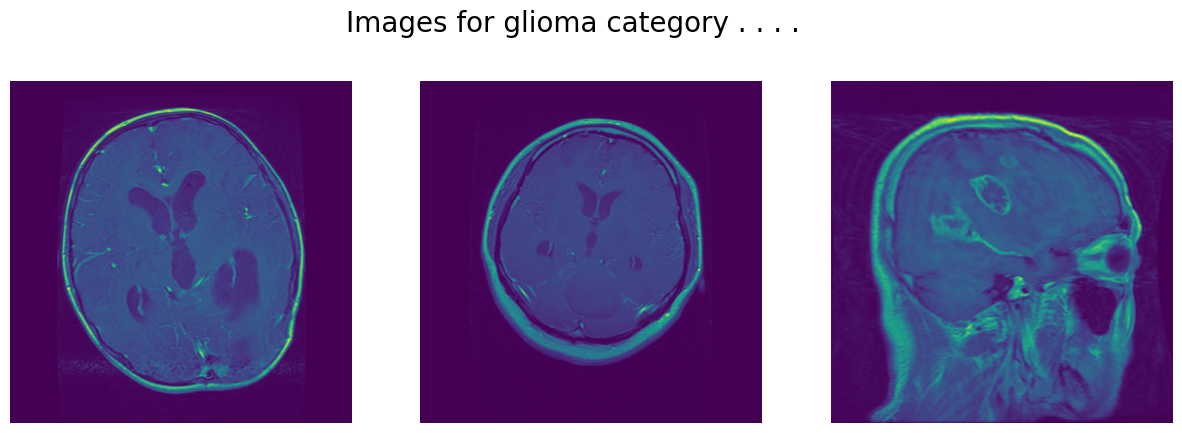

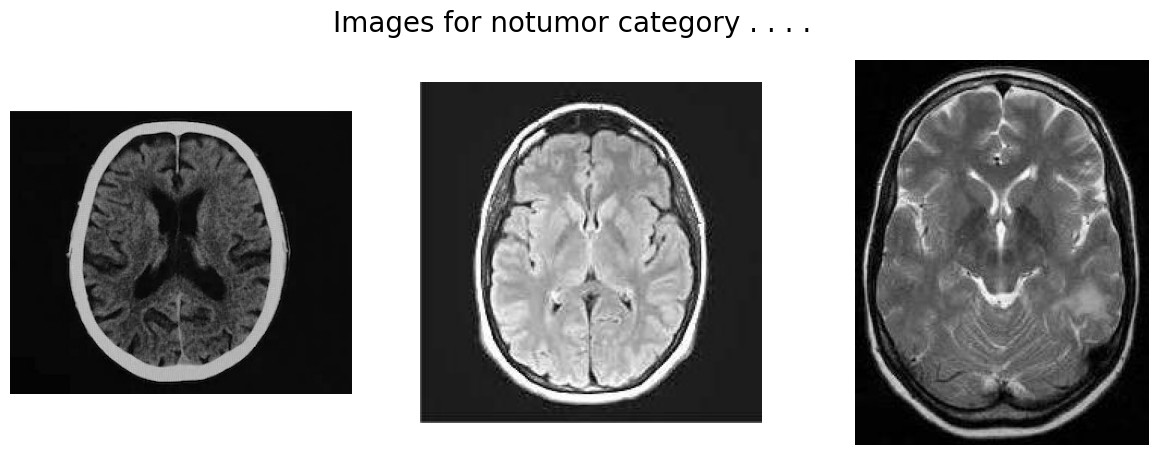

In [6]:
for cat in classes:
  if cat!= '.DS_Store':
    image_dir = f'{path_test}/{cat}'
    images = os.listdir(image_dir)
    images = [img for img in images if os.path.isfile(os.path.join(image_dir, img))]

    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    fig.suptitle(f'Images for {cat} category . . . .',
                 fontsize = 20)

    for i in range(3):
        if images:
            k = np.random.randint(0, len(images))
            img = np.array(Image.open(f'{path_test}/{cat}/{images[k]}')) # Fixed: Replaced 'extracted_folder' with 'path'
            ax[i].imshow(img)
            ax[i].axis('off')
        else:
            print(f"No images found in directory: {image_dir}")
    plt.show()

In [82]:
train_folder = ["/content/archive/Train/glioma","/content/archive/Train/meningioma","/content/archive/Train/notumor","/content/archive/Train/pituitary"]
test_folder = ["/content/archive/Test/glioma","/content/archive/Test/meningioma","/content/archive/Test/notumor","/content/archive/Test/pituitary"]

IMG_SIZE = 128
SPLIT = 0.2

X_train, Y_train = [], []
X_test, Y_test = [], []

classes = ["giloma", "meningioma", "notumor","pituitary"]

In [83]:
for i, train_path in enumerate(train_folder):
    images = glob(f"{train_path}/*.*")
    print(f"Found {len(images)} images in {train_path}")

    for image in images:
        img = cv2.imread(image)
        if img is not None:
            X_train.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
            Y_train.append(i)
        else:
            print(f"Failed to load image: {image}")

Found 1321 images in /content/archive/Train/glioma
Found 1339 images in /content/archive/Train/meningioma
Found 1595 images in /content/archive/Train/notumor
Found 1457 images in /content/archive/Train/pituitary


In [9]:
for i,test_pat in enumerate(test_folder):
  images = glob(f"{test_pat}/*.*")
  print(f"Found {len(images)} images in {test_pat}")

  for image in images:
    img = cv2.imread(image)
    if img is not None:
      X_test.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
      Y_test.append(i)
    else:
      print(f"Failed to load image: {image}")

Found 300 images in /content/archive/Test/glioma
Found 306 images in /content/archive/Test/meningioma
Found 405 images in /content/archive/Test/notumor
Found 300 images in /content/archive/Test/pituitary


In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(Y_test)

[0 0 0 ... 3 3 3]


In [11]:

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (5712, 128, 128, 3)
Y_train shape: (5712,)
X_test shape: (1311, 128, 128, 3)
Y_test shape: (1311,)


In [12]:
Y_train = to_categorical(Y_train, num_classes=len(classes))
Y_test = to_categorical(Y_test, num_classes=len(classes))

In [13]:
Y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [14]:
model = tf.keras.Sequential([

    layers.Conv2D(32, kernel_size=6, activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(64, kernel_size=5, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.ReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(256, kernel_size=6, activation='relu', padding='same'),

    layers.Conv2D(32, kernel_size=5, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(64, kernel_size=4, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.ReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(256, kernel_size=5, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),


    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.002)),
    layers.Dropout(0.6),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),

    layers.Dense(4, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │           3,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │         204,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,539,460 (9.69 MB)

 Trainable params: 2,539,076 (9.69 MB)

 Non-trainable params: 384 (1.50 KB)

In [16]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [17]:
datagen.fit(X_train)

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

In [19]:
model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_test, Y_test),
    epochs=10,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.4499 - loss: 1.5914

179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 211ms/step - accuracy: 0.4504 - loss: 1.5902 - val_accuracy: 0.3295 - val_loss: 4.3769 - learning_rate: 0.0010
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6478 - loss: 1.0453

179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.6479 - loss: 1.0449 - val_accuracy: 0.3448 - val_loss: 3.1132 - learning_rate: 0.0010
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7318 - loss: 0.8335

179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.7318 - loss: 0.8332 - val_accuracy: 0.3898 - val_loss: 2.4360 - learning_rate: 0.0010
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7677 - loss: 0.7075

179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 144ms/step - accuracy: 0.7677 - loss: 0.7073 - val_accuracy: 0.5965 - val_loss: 1.0247 - learning_rate: 0.0010
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8020 - loss: 0.6137

179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.8021 - loss: 0.6136 - val_accuracy: 0.7414 - val_loss: 0.6243 - learning_rate: 0.0010
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.8148 - loss: 0.5530 - val_accuracy: 0.7330 - val_loss: 0.7402 - learning_rate: 0.0010
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 141ms/step - accuracy: 0.8377 - loss: 0.5026 - val_accuracy: 0.6438 - val_loss: 0.8106 - learning_rate: 0.0010
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8445 - loss: 0.4402

179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.8445 - loss: 0.4402 - val_accuracy: 0.8177 - val_loss: 0.5152 - learning_rate: 0.0010
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8515 - loss: 0.4389

179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.8515 - loss: 0.4388 - val_accuracy: 0.8299 - val_loss: 0.4832 - learning_rate: 0.0010
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8643 - loss: 0.4194

179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step - accuracy: 0.8644 - loss: 0.4192 - val_accuracy: 0.8635 - val_loss: 0.3752 - learning_rate: 0.0010


In [21]:
y_pred = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [22]:
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

In [24]:
classification_report = classification_report(y_true, y_pred, target_names=classes)
print(classification_report)

              precision    recall  f1-score   support

      giloma       0.92      0.72      0.81       300
  meningioma       0.77      0.72      0.75       306
     notumor       0.86      0.99      0.92       405
   pituitary       0.90      0.99      0.94       300

    accuracy                           0.86      1311
   macro avg       0.86      0.85      0.85      1311
weighted avg       0.86      0.86      0.86      1311



41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


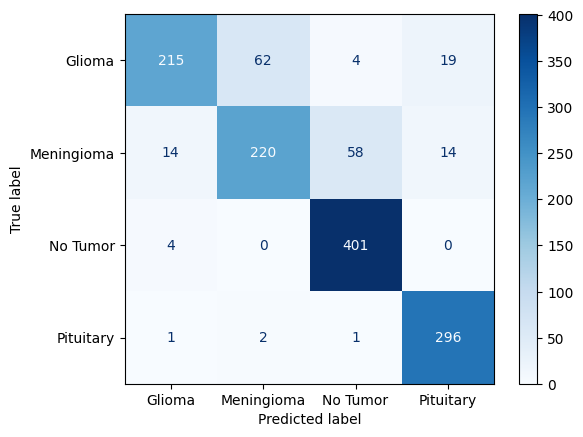

In [29]:
cm = confusion_matrix(Y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])
disp.plot(cmap='Blues')
plt.show()

In [34]:
model.save('brain_tumor_vishva.h5') # Added quotes around the file name to treat it as a string

In [79]:
uploaded = files.upload()

Saving Tr-gl_0015.jpg to Tr-gl_0015.jpg


In [80]:
def upload_and_predict(model):
    for filename in uploaded.keys():

        img = Image.open(filename)
        img = img.resize((128, 128))
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = classes[np.argmax(prediction)]

        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis('off')
        plt.show()

        print(f"\n🔍 Prediction: {predicted_class} ({np.max(prediction)*100:.2f}% confidence)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


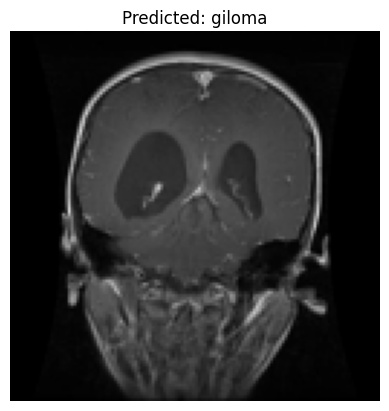


🔍 Prediction: giloma (99.91% confidence)


In [81]:
upload_and_predict(model)


# **This for deployment so ignore this part of the code**

In [87]:
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

def predict_image(img):
    img = img.convert("RGB")
    img = img.resize((128, 128))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = prediction[0][class_index]

    return f"{class_names[class_index]} ({confidence:.2f})"

In [90]:
demo = gr.Interface(fn=predict_image, inputs=gr.Image(type="pil"), outputs="text")
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d3116a38bfe7c05306.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
